In [11]:
import pysam
import matplotlib.pyplot as plt

# File path to BAM file
bam_file = "/uufs/chpc.utah.edu/common/home/u0962361/RNAseq/Semester_Project/output_Aligned.sortedByCoord.out.bam"

# Open BAM file
samfile = pysam.AlignmentFile(bam_file, "rb")

# List to store mapping qualities
map_qualities = []

# Iterate over the reads in the BAM file
for read in samfile:
    if not read.is_unmapped:
        map_qualities.append(read.mapping_quality)

# Plot distribution of mapping quality
plt.figure(figsize=(10, 6))
plt.hist(map_qualities, bins=50, color="orange", edgecolor="black")
plt.title("Mapping Quality Distribution")
plt.xlabel("Mapping Quality")
plt.ylabel("Frequency")
plt.show()

# Close BAM file
samfile.close()


: 

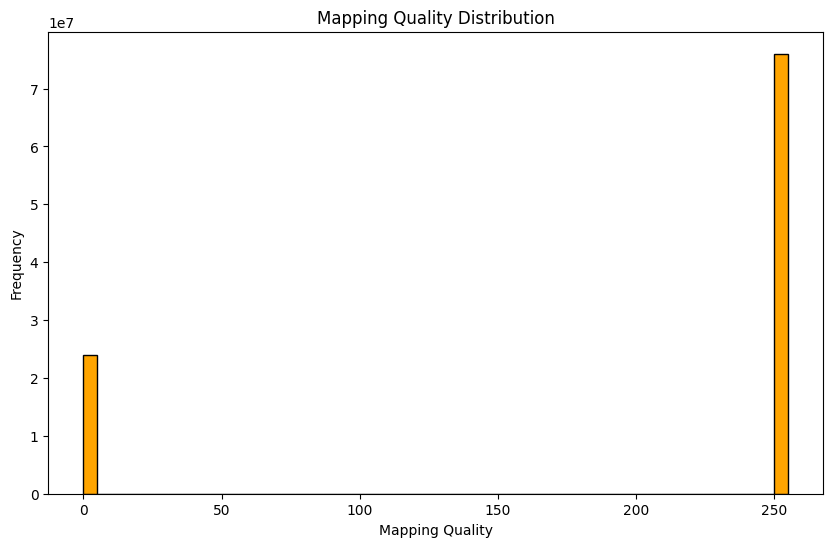

In [4]:
import pysam
import numpy as np
import matplotlib.pyplot as plt

# File path to BAM file
bam_file = "/uufs/chpc.utah.edu/common/home/u0962361/RNAseq/Semester_Project/output_Aligned.sortedByCoord.out.bam"

# Open BAM file
samfile = pysam.AlignmentFile(bam_file, "rb")

# List to store mapping qualities (using numpy for efficient storage)
map_qualities = []

# Limit the number of reads to avoid memory issues (e.g., process first 1 million reads)
num_reads_to_process = 100000000

# Iterate over the reads in the BAM file (with limit to reduce memory load)
read_count = 0
for read in samfile.fetch():
    if not read.is_unmapped:
        map_qualities.append(read.mapping_quality)
    
    # Stop after processing a certain number of reads
    read_count += 1
    if read_count >= num_reads_to_process:
        break

# Convert list to numpy array for efficient histogram plotting
map_qualities = np.array(map_qualities)

# Plot distribution of mapping quality
plt.figure(figsize=(10, 6))
plt.hist(map_qualities, bins=50, color="orange", edgecolor="black")
plt.title("Mapping Quality Distribution")
plt.xlabel("Mapping Quality")
plt.ylabel("Frequency")
plt.show()

# Close BAM file
samfile.close()


In [2]:
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to run featureCounts via subprocess
def run_featurecounts(bam_file, gtf_file, output_file):
    command = [
        "featureCounts",
        "-a", gtf_file,  # Annotation file in GTF format
        "-o", output_file,  # Output file for counts
        bam_file  # BAM file to count features for
    ]
    
    # Run the featureCounts command
    subprocess.run(command, check=True)
    print(f"featureCounts output saved to {output_file}")

# Path to your files (change these paths to your actual files)
bam_file = "/uufs/chpc.utah.edu/common/home/u0962361/RNAseq/Semester_Project/output_Aligned.sortedByCoord.out.bam"  # Your BAM file
gtf_file = "/uufs/chpc.utah.edu/common/home/u0962361/RNAseq/Semester_Project/Homo_sapiens.GRCh38.104.gtf"  # Your GTF file
output_file = "gene_counts.txt"  # Output file for the counts


# Step 2: Load the output of featureCounts into Python (the gene counts file)
# After running featureCounts, we read the output file (gene_counts.txt)
gene_counts = pd.read_csv(output_file, sep='\t', comment='#', index_col=0)

# Display the first few rows to check the data
print(gene_counts.head())

# Step 3: Visualize the Gene Expression Distribution
# Example: Histogram for the first sample (you can modify for more samples)

plt.figure(figsize=(10, 6))
sns.histplot(gene_counts.iloc[:, 0], kde=True, bins=50)
plt.title('Gene Expression Distribution - Sample 1')
plt.xlabel('Gene Count')
plt.ylabel('Frequency')
plt.show()

# Example: Violin plot across multiple samples (adjust according to your data)
plt.figure(figsize=(10, 6))
sns.violinplot(data=gene_counts.iloc[:, :3])  # Adjust based on the number of columns/samples
plt.title('Gene Expression Distribution across Samples')
plt.xlabel('Samples')
plt.ylabel('Gene Counts')
plt.show()


                                                               Chr  \
Geneid                                                               
ENSG00000284662                                                  1   
ENSG00000186827                    1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1   
ENSG00000186891                1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1   
ENSG00000160072  1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...   
ENSG00000041988  1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...   

                                                             Start  \
Geneid                                                               
ENSG00000284662                                             685679   
ENSG00000186827  1211340;1211340;1211704;1211942;1211942;121201...   
ENSG00000186891  1203508;1203508;1203844;1203844;1204034;120403...   
ENSG00000160072  1471765;1471784;1477274;1477274;1478026;147864...   
ENSG00000041988  6624866;6625150;6625171;6625181;6625192;662519...   

                  

KeyboardInterrupt: 

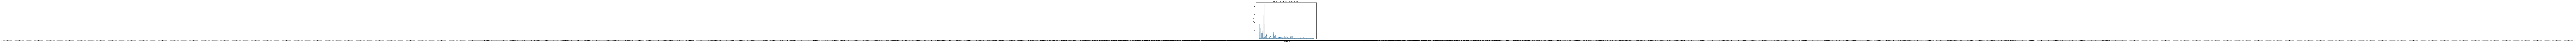

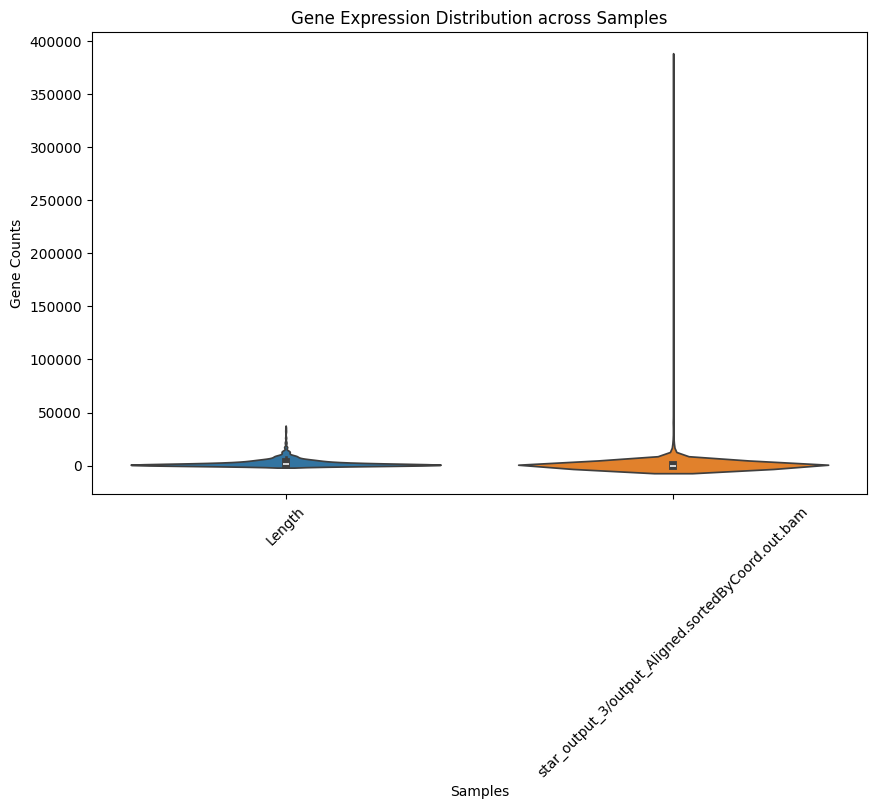

In [11]:
# Downsample gene counts to a smaller subset (e.g., 1 million samples)
sampled_gene_counts = gene_counts.sample(n=1000, random_state=42)

# Plot histograms and violin plots using the downsampled data
plt.figure(figsize=(10, 6))
sns.histplot(sampled_gene_counts.iloc[:, 0], kde=True, bins=50)
plt.title('Gene Expression Distribution - Sample 1')
plt.xlabel('Gene Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=sampled_gene_counts.iloc[:, :10])  # Change to all samples or a subset
plt.title('Gene Expression Distribution across Samples')
plt.xlabel('Samples')
plt.ylabel('Gene Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels if you have many samples
plt.show()

In [5]:
print(len(gene_counts))



60664
